In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vqav2-training-dataset/sampled_data.csv


**Data Loading**

In [2]:
import pandas as pd
data_df = pd.read_csv('/kaggle/input/vqav2-training-dataset/sampled_data.csv')

**EDA and Preprocessing**

In [3]:
data_df.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers
0,What is the person playing?,what is the person,frisbee,390447,other,390447016,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[{'answer': 'frisbee', 'answer_confidence': 'y..."
1,What color is the top and sides of the net?,what color is the,white,284770,other,284770000,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[{'answer': 'white', 'answer_confidence': 'yes..."
2,What time does the clock say?,what time,5:15,207620,number,207620015,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[{'answer': '5:15', 'answer_confidence': 'yes'..."
3,What are the children riding on?,what are the,boogie board,288519,other,288519003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[{'answer': 'surfboard', 'answer_confidence': ..."
4,What season is it?,what,summer,373730,other,373730003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[{'answer': 'summer', 'answer_confidence': 'ye..."


In [4]:
data_df.shape

(110939, 8)

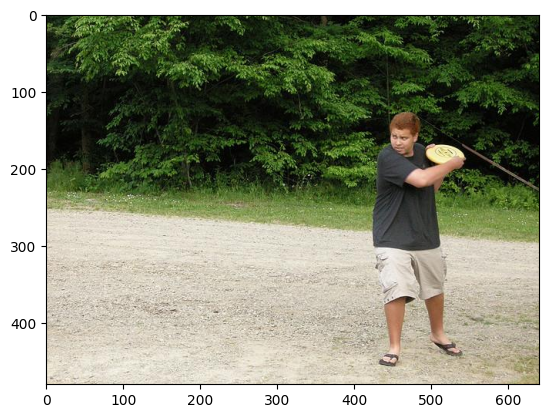

In [5]:
import pandas as pd
import ast
from PIL import Image
import matplotlib.pyplot as plt
import io

# Read the CSV file into a DataFrame
# df = pd.read_csv('sampled_data.csv')

# Now you can recreate the PIL image from the bytes data
sample = data_df.iloc[0]  # Adjust the index as needed

# Convert the string representation of bytes to actual bytes
image_bytes = ast.literal_eval(sample['image'])
image_bytes = bytes(image_bytes)

PIL_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')

# Display the image using matplotlib
plt.imshow(PIL_image)
plt.show()

#data_df.head()

**Print the count of images, questions, answers annotations**

In [6]:
import pandas as pd
import os
 
# Total number of unique images
total_images = data_df['image_id'].nunique()

# Total number of questions
total_questions = len(data_df)

# Total number of answer annotations
total_answer_annotations = data_df['answers'].apply(lambda x: len(eval(x))).sum()

# Total number of answers (not unique) given for a question
# Assuming the first row contains valid answer annotations
total_answers = len(eval(data_df.iloc[0]['answers']))

print("Total number of images: ", total_images)
print("Total number of questions: ", total_questions)
print("Total number of answer annotations: ", total_answer_annotations)
print("Total number of answers (not unique) given for a question: ", total_answers)

Total number of images:  58001
Total number of questions:  110939
Total number of answer annotations:  1109390
Total number of answers (not unique) given for a question:  10


**Converting the answer columns from [{}] to []**

In [7]:
data_df['answers'] = data_df['answers'].apply(lambda x: [item['answer'] for item in eval(x)])

In [8]:
data_df.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers
0,What is the person playing?,what is the person,frisbee,390447,other,390447016,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[frisbee, frisbee, frisbee, frisbee, frisbee, ..."
1,What color is the top and sides of the net?,what color is the,white,284770,other,284770000,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[white, white, white, white,, white and white,..."
2,What time does the clock say?,what time,5:15,207620,number,207620015,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[5:15, 5:15, 5:15, 5:15, 5:15, 5:15, 5:15, 5:1..."
3,What are the children riding on?,what are the,boogie board,288519,other,288519003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[surfboard, surfboard, boogie board, boogie bo..."
4,What season is it?,what,summer,373730,other,373730003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[summer, summer, summer, summer, summer, sprin..."


**Dispalying to 5 images with question asked and correspoding answer**

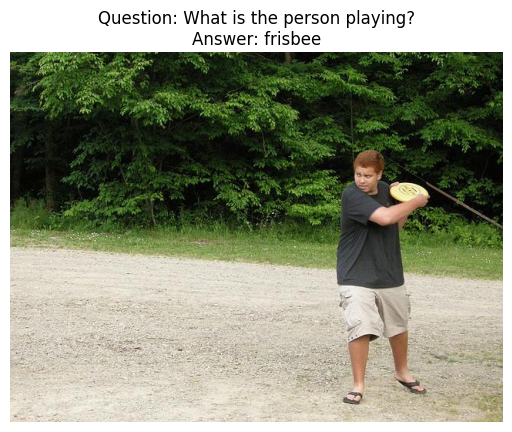

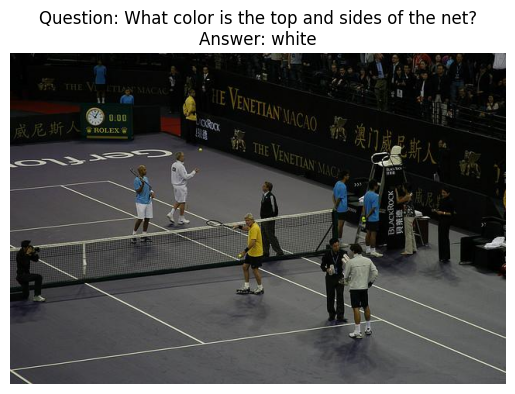

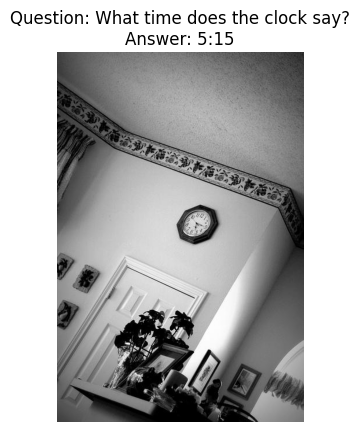

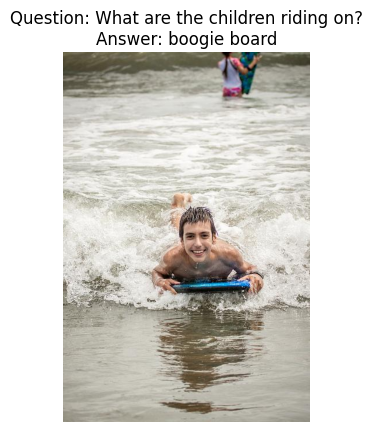

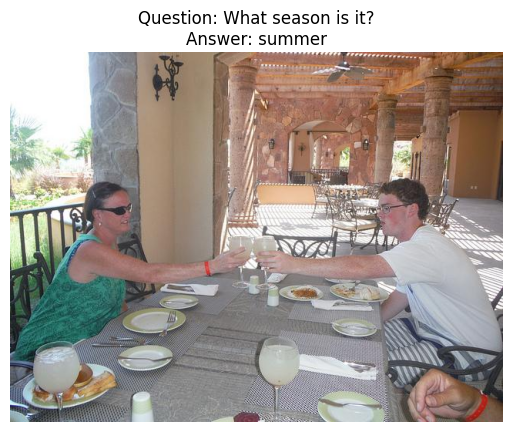

In [9]:

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import io
import ast

# Assuming data_df is your DataFrame with columns: 'image', 'question', 'multiple_choice_answer'

# Select the first 5 rows
sample_df = data_df.head(5)

# Loop through the selected DataFrame
for index, row in sample_df.iterrows():
    # Convert the string representation of bytes data to actual bytes
    image_bytes = ast.literal_eval(row['image'])
    image_bytes = bytes(image_bytes)
    
    # Recreate the PIL image from the bytes data
    PIL_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    
    # Display the image using matplotlib
    plt.imshow(PIL_image)
    plt.title(f"Question: {row['question']}\nAnswer: {row['multiple_choice_answer']}")
    plt.axis('off')
    plt.show()

**Distribution of number of words in answers:**

**Analyse the no of words in answers column for EDA purpose**

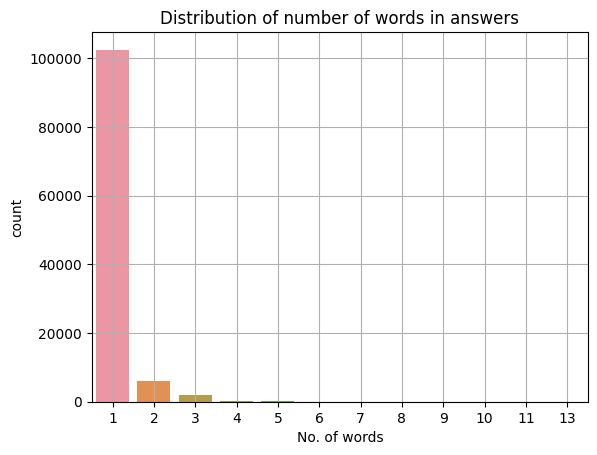

(110939, 8)

In [10]:
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
# calculating the count of words for every answer
ans_word_count = data_df['multiple_choice_answer'].apply(
    lambda x: len(word_tokenize(x)))
     

sns.countplot(x=ans_word_count)
plt.title("Distribution of number of words in answers")
plt.xlabel("No. of words")
plt.grid()
plt.show()
data_df.shape


**Choosing samples from training set with only 1 word answers**

In [11]:
data_df = data_df[ans_word_count == 1]
data_df.shape

(102528, 8)

**%wise Different answer types**

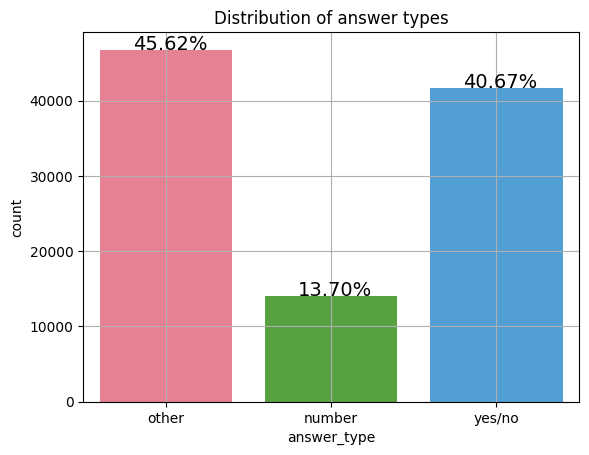

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
# data_df = pd.read_csv('your_csv_file.csv')

# Unique answer types
unique_answer_types = data_df['answer_type'].unique()

# Define custom colors for each answer type
custom_colors = sns.color_palette("husl", len(unique_answer_types))

# Plotting
ax = sns.countplot(data=data_df, x='answer_type', palette=custom_colors)

# Annotating
for p in ax.patches:
    ax.annotate(
        '{:.2f}%'.format((p.get_height()/len(data_df))*100),
        (p.get_x()+0.2, p.get_height()),
        size=14
    )

plt.title("Distribution of answer types")
plt.grid()
plt.show()

**Printing Total number of unique one-word answers**

In [13]:
# computing frequency of one-word answers
one_word_ans_freq = data_df['multiple_choice_answer'].value_counts()

print("Total number of unique one-word answers: ",
      one_word_ans_freq.keys().nunique())


Total number of unique one-word answers:  5255


**Handling/Preprocessing of Questions**

In [14]:
data_df['question'].sample(10)

81958         Does the donut on the left look sweet?
21502    Would it be messy to use this toilet as is?
31629                How many signs are on the pole?
51407         What country's symbol is on the plane?
26571                       What brand is the truck?
53727          Is MasterCard a sponsor of this game?
80163                     Are all these foods green?
42471                            Where is the spoon?
93962                            What is in his hat?
58880                              Is it night time?
Name: question, dtype: object

In [15]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.9 MB/s eta 0:00:00


**LowerCase and Remove '?'**

In [16]:
import contractions
import re
def preprocess_questions(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text
     

data_df['question'] = data_df['question'].apply(lambda x: preprocess_questions(x))
data_df['question'].sample(10)

85179                                is this a family 
103534             what is the man on the right doing 
99212                 is there a redhead in the photo 
58039                           what color is the rug 
77791                    what color are the cats eyes 
97643                         is this picture indoors 
72703            how many species are in this picture 
70817     how many elephants have food in their mouth 
3920                what type of drink is in the cups 
224               how many animals are in the picture 
Name: question, dtype: object

In [17]:
data_df.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers
0,what is the person playing,what is the person,frisbee,390447,other,390447016,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[frisbee, frisbee, frisbee, frisbee, frisbee, ..."
1,what color is the top and sides of the net,what color is the,white,284770,other,284770000,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[white, white, white, white,, white and white,..."
2,what time does the clock say,what time,5:15,207620,number,207620015,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[5:15, 5:15, 5:15, 5:15, 5:15, 5:15, 5:15, 5:1..."
4,what season is it,what,summer,373730,other,373730003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[summer, summer, summer, summer, summer, sprin..."
5,is this cycle unusual,is this,yes,276739,yes/no,276739001,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[no, yes, no, yes, yes, yes, yes, yes, yes, no]"


In [18]:
data_df.shape

(102528, 8)

**Sampling 10k rows from 25%oftraining data set**

In [19]:
data_df_10k = data_df.sample(n=10000, random_state=42, )

In [20]:
data_df_10k.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers
6737,is the photo in black and white,is the,yes,510860,yes/no,510860002,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ..."
103005,is the girl a professional skateboarder,is the,no,283729,yes/no,283729006,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[no, no, no, no, no, no, no, no, no, no]"
84860,is the picture in color,is the,no,24682,yes/no,24682001,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[no, no, no, no, no, no, no, no, no, no]"
82165,are the people at a sporting event,are the,yes,325891,yes/no,325891005,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ..."
1180,what color is the cat,what color is the,brown,358378,other,358378003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[brown, brown, tan, beige, beige and brown, wh..."


In [21]:
data_df_10k.reset_index(drop=True, inplace=True)

In [22]:
data_df_10k.shape

(10000, 8)

In [24]:
data_df_10k.shape[0]

10000

**Generating Unique Labels**

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the 'multiple_choice_answer' column
label_encoder.fit(data_df_10k['multiple_choice_answer'])

# Transform the 'multiple_choice_answer' column to numerical labels
data_df_10k['label'] = label_encoder.transform(data_df_10k['multiple_choice_answer'])
unique_ans = len(label_encoder.classes_)
# Print the number of unique answers and the corresponding labels
print("Number of unique answers: ", len(label_encoder.classes_))
#print("Answers and their corresponding labels: ", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Number of unique answers:  1443


In [26]:
data_df_10k.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers,label
0,is the photo in black and white,is the,yes,510860,yes/no,510860002,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
1,is the girl a professional skateboarder,is the,no,283729,yes/no,283729006,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[no, no, no, no, no, no, no, no, no, no]",884
2,is the picture in color,is the,no,24682,yes/no,24682001,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[no, no, no, no, no, no, no, no, no, no]",884
3,are the people at a sporting event,are the,yes,325891,yes/no,325891005,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
4,what color is the cat,what color is the,brown,358378,other,358378003,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[brown, brown, tan, beige, beige and brown, wh...",292


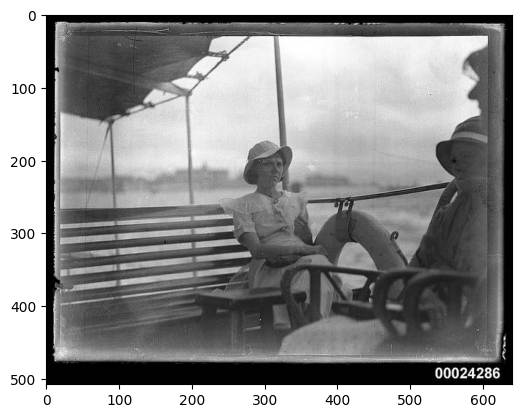

In [27]:
# import pandas as pd
# import io
# from PIL import Image
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named data_df_10k
# # Extract image data of the 0th index
# image_data = data_df_10k.at[0, 'image']
# df_data_10k['image'] = df_data_10k['image'].apply(lambda x: io.BytesIO(ast.literal_eval(x))) 
# # Convert the string representation of the image back to bytes
# image_bytes = io.BytesIO(image_data.encode('utf-8'))

# # Now you can recreate the PIL image from the bytes data
# PIL_image = Image.open(image_bytes)

# # Display the image using matplotlib
# plt.imshow(PIL_image)
# plt.axis('off')  # Turn off axis
# plt.show()


import pandas as pd
import ast
from PIL import Image
import matplotlib.pyplot as plt
import io

# Read the CSV file into a DataFrame
#df = pd.read_csv('sampled_data.csv')

# Convert the string representation of the image back to bytes
data_df_10k['image'] = data_df_10k['image'].apply(lambda x: io.BytesIO(ast.literal_eval(x))) 

# Now you can recreate the PIL image from the bytes data
sample = data_df_10k.iloc[0]  # Adjust the index as needed
PIL_image = Image.open(sample['image']).convert('RGB')

# Display the image using matplotlib
plt.imshow(PIL_image)
plt.show()


In [28]:
data_df_10k.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers,label
0,is the photo in black and white,is the,yes,510860,yes/no,510860002,<_io.BytesIO object at 0x78f0e9726e80>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
1,is the girl a professional skateboarder,is the,no,283729,yes/no,283729006,<_io.BytesIO object at 0x78f0e9726fc0>,"[no, no, no, no, no, no, no, no, no, no]",884
2,is the picture in color,is the,no,24682,yes/no,24682001,<_io.BytesIO object at 0x78f0e9727010>,"[no, no, no, no, no, no, no, no, no, no]",884
3,are the people at a sporting event,are the,yes,325891,yes/no,325891005,<_io.BytesIO object at 0x78f0e9727060>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
4,what color is the cat,what color is the,brown,358378,other,358378003,<_io.BytesIO object at 0x78f0de19e7f0>,"[brown, brown, tan, beige, beige and brown, wh...",292


In [29]:
#data_df_10k.to_csv('1ksampling.csv',index=False)
# df.to_csv('output.csv', )

**Check for count of rgb and grayscale images**

In [30]:
import pandas as pd
from PIL import Image

# Assuming df is your DataFrame and 'image' is the column containing image paths
# Initialize counters
rgb_count = 0
grayscale_count = 0

# Iterate over each row
for index, row in data_df_10k.iterrows():
    # Open the image
    PIL_image = Image.open(row['image'])
    
    # Get the mode of the image
    image_mode = PIL_image.mode
    
    # Increment counters based on the mode
    if image_mode == "RGB":
        rgb_count += 1
    elif image_mode == "L":
        grayscale_count += 1

# Print the counts
print("RGB Count:", rgb_count)
print("Grayscale Count:", grayscale_count)


RGB Count: 9969
Grayscale Count: 31


In [31]:
import pandas as pd
from PIL import Image

# Assuming df is your DataFrame and 'image' is the column containing image paths
# Create a list to store indices of rows with RGB images
indices_to_keep = []

# Iterate over each row
for index, row in data_df_10k.iterrows():
    # Open the image
    PIL_image = Image.open(row['image'])
    
    # Get the mode of the image
    image_mode = PIL_image.mode
    
    # Check if the image is RGB (not grayscale)
    if image_mode == "RGB":
        indices_to_keep.append(index)

# Create a new DataFrame containing only rows with RGB images
df_rgb = data_df_10k.loc[indices_to_keep].reset_index(drop=True)


In [32]:
import pandas as pd
from PIL import Image

# Assuming df is your DataFrame and 'image' is the column containing image paths
# Initialize counters
rgb_count = 0
grayscale_count = 0

# Iterate over each row
for index, row in df_rgb.iterrows():
    # Open the image
    PIL_image = Image.open(row['image'])
    
    # Get the mode of the image
    image_mode = PIL_image.mode
    
    # Increment counters based on the mode
    if image_mode == "RGB":
        rgb_count += 1
    elif image_mode == "L":
        grayscale_count += 1

# Print the counts
print("RGB Count:", rgb_count)
print("Grayscale Count:", grayscale_count)


RGB Count: 9969
Grayscale Count: 0


In [33]:
data_df_10k = df_rgb
data_df_10k

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers,label
0,is the photo in black and white,is the,yes,510860,yes/no,510860002,<_io.BytesIO object at 0x78f0e9726e80>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
1,is the girl a professional skateboarder,is the,no,283729,yes/no,283729006,<_io.BytesIO object at 0x78f0e9726fc0>,"[no, no, no, no, no, no, no, no, no, no]",884
2,is the picture in color,is the,no,24682,yes/no,24682001,<_io.BytesIO object at 0x78f0e9727010>,"[no, no, no, no, no, no, no, no, no, no]",884
3,are the people at a sporting event,are the,yes,325891,yes/no,325891005,<_io.BytesIO object at 0x78f0e9727060>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1431
4,what color is the cat,what color is the,brown,358378,other,358378003,<_io.BytesIO object at 0x78f0de19e7f0>,"[brown, brown, tan, beige, beige and brown, wh...",292
...,...,...,...,...,...,...,...,...,...
9964,how many people have cell phones,how many,2,154462,number,154462000,<_io.BytesIO object at 0x78f0e96087c0>,"[2, 2, 2, 2, 3, 2, 2, 0, 2, 2]",52
9965,is this a modern train,is this a,yes,525101,yes/no,525101021,<_io.BytesIO object at 0x78f0e9608810>,"[yes, yes, yes, yes, yes, yes, yes, yes, no, no]",1431
9966,is that a cat,is that a,no,176568,yes/no,176568002,<_io.BytesIO object at 0x78f0e9608860>,"[no, no, mp, no, no, no, no, no, no, no]",884
9967,what kind of shoes is this person wearing,what kind of,sandals,282835,other,282835002,<_io.BytesIO object at 0x78f0e96088b0>,"[sandals, sandals, sandals, sandals, sandals, ...",1090


In [34]:
import torch
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
device

'cuda'

In [35]:
!pip install -q sentence-transformers

In [36]:
import torch
from torchvision import transforms
from transformers import ViTModel, ViTFeatureExtractor, BertTokenizer, BertModel
from PIL import Image
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch import nn
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


2024-05-18 11:58:41.655341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 11:58:41.655460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 11:58:41.764186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [38]:


# Define the custom dataset
class CustomDataset(Dataset):
    def __init__(self, dataframe, img_embedder, tokenizer, text_embedder, unique_ans, transform, device):
        self.dataframe = dataframe
        self.img_embedder = img_embedder
        self.tokenizer = tokenizer
        self.text_embedder = text_embedder
        self.unique_ans = unique_ans
        self.transform = transform
        self.device = device

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_data = row['image']
        PIL_image = Image.open(img_data).convert('RGB')
        img = self.transform(PIL_image)
        img = img.unsqueeze(0).to(self.device)
        img_embedding = self.img_embedder(img).last_hidden_state.mean(dim=1).squeeze()

        question = row["question"]
        inputs = self.tokenizer(question, return_tensors="pt", padding=True, truncation=True).to(self.device)
        question_embedding = self.text_embedder(**inputs).last_hidden_state.mean(dim=1).squeeze()

        concatenated = torch.cat((img_embedding, question_embedding))

        label = row["label"]
        label_vector = torch.zeros(self.unique_ans + 1).to(self.device)
        label_vector[label] = 1

        return concatenated, label_vector


In [39]:
# Load and preprocess the data
#data_df_10k = pd.read_csv('your_data_file.csv')  # Replace with your actual data file
label_encoder = LabelEncoder()
label_encoder.fit(data_df_10k['multiple_choice_answer'])
data_df_10k['label'] = label_encoder.transform(data_df_10k['multiple_choice_answer'])
unique_ans = len(label_encoder.classes_)

train_size = int(0.8 * data_df_10k.shape[0])
train_df = data_df_10k[:train_size]
test_df = data_df_10k[train_size:]


In [80]:
data_df_10k.head()

,question,question_type,multiple_choice_answer,image_id,answer_type,question_id,image,answers,label
0,is the photo in black and white,is the,yes,510860,yes/no,510860002,<_io.BytesIO object at 0x78f0e9726e80>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1428
1,is the girl a professional skateboarder,is the,no,283729,yes/no,283729006,<_io.BytesIO object at 0x78f0e9726fc0>,"[no, no, no, no, no, no, no, no, no, no]",882
2,is the picture in color,is the,no,24682,yes/no,24682001,<_io.BytesIO object at 0x78f0e9727010>,"[no, no, no, no, no, no, no, no, no, no]",882
3,are the people at a sporting event,are the,yes,325891,yes/no,325891005,<_io.BytesIO object at 0x78f0e9727060>,"[yes, yes, yes, yes, yes, yes, yes, yes, yes, ...",1428
4,what color is the cat,what color is the,brown,358378,other,358378003,<_io.BytesIO object at 0x78f0de19e7f0>,"[brown, brown, tan, beige, beige and brown, wh...",291


In [41]:


# Define the image and text models
img_embedder = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k').to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_embedder = BertModel.from_pretrained('bert-base-uncased').to(device)

# Define the transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = CustomDataset(train_df, img_embedder, tokenizer, text_embedder, unique_ans, transform, device)
test_dataset = CustomDataset(test_df, img_embedder, tokenizer, text_embedder, unique_ans, transform, device)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [42]:
# Define the VQA model
class VQAModel(nn.Module):
    def __init__(self, no_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2*768, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, no_classes)
        )

    def forward(self, x):
        return self.layers(x)

**Training without LoRA**

In [47]:
vqa_model = VQAModel(unique_ans + 1).to(device)
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(vqa_model.parameters(), lr=0.001)

# Initialize lists to store the metrics for each epoch
train_losses = []
train_accuracies = []
train_f1_scores = []
train_precisions = []
train_recalls = []

# Training loop with metric tracking
epochs = 5
start_time = time.time()

for epoch in range(epochs):
    vqa_model.train()
    train_loss = 0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = vqa_model(X)
        y_labels = torch.argmax(y, dim=1)
        loss = loss_fn(y_pred, y_labels)
        train_loss += loss.item()

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        y_pred_prob = torch.softmax(y_pred, dim=1)
        y_pred_label = torch.argmax(y_pred_prob, dim=1)
        total += y.size(0)
        correct += (y_pred_label == y_labels).sum().item()

        all_labels.extend(y_labels.cpu().numpy())
        all_preds.extend(y_pred_label.cpu().numpy())

    train_loss /= len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    train_f1_scores.append(f1_score(all_labels, all_preds, average='weighted',zero_division=1))
    train_precisions.append(precision_score(all_labels, all_preds, average='weighted',zero_division=1))
    train_recalls.append(recall_score(all_labels, all_preds, average='weighted',zero_division=1))

    print(f"Epoch: {epoch}\t|\tTrain loss: {train_loss:.4f}\t|\tTrain accuracy: {train_acc:.2f}\t|\t"
          f"F1 Score: {train_f1_scores[-1]:.4f}\t|\tPrecision: {train_precisions[-1]:.4f}\t|\tRecall: {train_recalls[-1]:.4f}")

end_time = time.time()
total_time = end_time - start_time

print(f"Training done in {total_time:.2f} seconds")
# Print final metrics
print(f"Final Training Metrics:")
print(f"Accuracy: {train_accuracies[-1]:.2f}%")
print(f"F1 Score: {train_f1_scores[-1]:.4f}")
print(f"Precision: {train_precisions[-1]:.4f}")
print(f"Recall: {train_recalls[-1]:.4f}")
print(f"Total Time Taken for Training (TTT): {total_time:.2f} seconds")
# # Training loop
# epochs = 10
# for epoch in range(epochs):
#     vqa_model.train()
#     train_loss = 0
#     correct = 0
#     total = 0

#     for X, y in train_dataloader:
#         X, y = X.to(device), y.to(device)
#         y_pred = vqa_model(X)
#         y_labels = torch.argmax(y, dim=1)
#         loss = loss_fn(y_pred, y_labels)
#         train_loss += loss.item()

#         optimiser.zero_grad()
#         loss.backward()
#         optimiser.step()

#         y_pred_prob = torch.softmax(y_pred, dim=1)
#         y_pred_label = torch.argmax(y_pred_prob, dim=1)
#         total += y.size(0)
#         correct += (y_pred_label == y_labels).sum().item()

#     train_loss /= len(train_dataloader)
#     train_acc = 100 * correct / total
#     print(f"Epoch: {epoch}\t|\tTrain loss: {train_loss}\t|\tTrain accuracy: {train_acc}")

# print("Training done")


 

Epoch: 0	|	Train loss: 3.8242	|	Train accuracy: 24.82	|	F1 Score: 0.1886	|	Precision: 0.5495	|	Recall: 0.2482
Epoch: 1	|	Train loss: 3.1344	|	Train accuracy: 27.74	|	F1 Score: 0.2279	|	Precision: 0.5654	|	Recall: 0.2774
Epoch: 2	|	Train loss: 2.8383	|	Train accuracy: 30.71	|	F1 Score: 0.2580	|	Precision: 0.5737	|	Recall: 0.3071
Epoch: 3	|	Train loss: 2.5361	|	Train accuracy: 34.45	|	F1 Score: 0.2966	|	Precision: 0.5457	|	Recall: 0.3445
Epoch: 4	|	Train loss: 2.2102	|	Train accuracy: 37.87	|	F1 Score: 0.3333	|	Precision: 0.5224	|	Recall: 0.3787
Training done in 2236.90 seconds
Final Training Metrics:
Accuracy: 37.87%
F1 Score: 0.3333
Precision: 0.5224
Recall: 0.3787
Total Time Taken for Training (TTT): 2236.90 seconds


In [60]:
#vqa_model.save_pretrained("/kaggle/working/vqa_without_lora")

In [49]:
torch.save(vqa_model.state_dict(), 'vit_bert_without_lora.pth')

**Training with LORA**


In [61]:
!pip install transformers accelerate evaluate datasets peft -q
import transformers
import accelerate
from peft import get_peft_model, LoraConfig

print(f"Transformers version: {transformers.__version__}")
print(f"Accelerate version: {accelerate.__version__}")
print(f"PEFT version: {peft.__version__}")

Transformers version: 4.39.3
Accelerate version: 0.29.3
PEFT version: 0.11.1


In [62]:
def print_trainable_parameters(model):
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param:.2f}"
    )

In [79]:
 print_trainable_parameters(vqa_model)

AttributeError: 'collections.OrderedDict' object has no attribute 'named_parameters'

In [64]:
print([(n, type(m)) for n, m in VQAModel(unique_ans+1).named_modules()])

[('', <class '__main__.VQAModel'>), ('layers', <class 'torch.nn.modules.container.Sequential'>), ('layers.0', <class 'torch.nn.modules.linear.Linear'>), ('layers.1', <class 'torch.nn.modules.activation.ReLU'>), ('layers.2', <class 'torch.nn.modules.linear.Linear'>), ('layers.3', <class 'torch.nn.modules.activation.ReLU'>), ('layers.4', <class 'torch.nn.modules.linear.Linear'>)]


In [65]:
peft_config = LoraConfig(
    target_modules = ["layers.0", "layers.2"],
    modules_to_save = ["layers.4"]
)

In [66]:
peft_model = get_peft_model(vqa_model, peft_config)
peft_model = peft_model.to(device)
peft_model.print_trainable_parameters()

trainable params: 746,229 || all params: 2,487,170 || trainable%: 30.0031


In [67]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(peft_model.parameters(), lr = 0.001)

In [71]:
# Initialize lists to store the metrics for each epoch
train_losses = []
train_accuracies = []
train_f1_scores = []
train_precisions = []
train_recalls = []

# Training loop with metric tracking
epochs = 2
start_time = time.time()

for epoch in range(epochs):
    train_loss = 0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = peft_model(X)
        y_labels = torch.argmax(y, dim=1)
        loss = loss_fn(y_pred, y_labels)
        train_loss += loss.item()

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        y_pred_prob = torch.softmax(y_pred, dim=1)
        y_pred_label = torch.argmax(y_pred_prob, dim=1)
        total += y.size(0)
        correct += (y_pred_label == y_labels).sum().item()

        all_labels.extend(y_labels.cpu().numpy())
        all_preds.extend(y_pred_label.cpu().numpy())

    train_loss /= len(train_dataloader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    train_f1_scores.append(f1_score(all_labels, all_preds, average='weighted',zero_division=1))
    train_precisions.append(precision_score(all_labels, all_preds, average='weighted',zero_division=1))
    train_recalls.append(recall_score(all_labels, all_preds, average='weighted',zero_division=1))

    print(f"Epoch: {epoch}\t|\tTrain loss: {train_loss:.4f}\t|\tTrain accuracy: {train_acc:.2f}\t|\t"
          f"F1 Score: {train_f1_scores[-1]:.4f}\t|\tPrecision: {train_precisions[-1]:.4f}\t|\tRecall: {train_recalls[-1]:.4f}")

end_time = time.time()
total_time = end_time - start_time

print(f"Training done in {total_time:.2f} seconds")
# Print final metrics
print(f"Final Training Metrics:")
print(f"Accuracy: {train_accuracies[-1]:.2f}%")
print(f"F1 Score: {train_f1_scores[-1]:.4f}")
print(f"Precision: {train_precisions[-1]:.4f}")
print(f"Recall: {train_recalls[-1]:.4f}")
print(f"Total Time Taken for Training (TTT): {total_time:.2f} seconds")
 

Epoch: 0	|	Train loss: 1.5032	|	Train accuracy: 52.74	|	F1 Score: 0.4889	|	Precision: 0.6000	|	Recall: 0.5274
Epoch: 1	|	Train loss: 1.2943	|	Train accuracy: 57.64	|	F1 Score: 0.5477	|	Precision: 0.6318	|	Recall: 0.5764
Training done in 899.50 seconds
Final Training Metrics:
Accuracy: 57.64%
F1 Score: 0.5477
Precision: 0.6318
Recall: 0.5764
Total Time Taken for Training (TTT): 899.50 seconds


In [72]:
torch.save(peft_model.state_dict(), 'vit_bert_with_lora.pth')

In [ ]:
peft_model.save_pretrained("/kaggle/working/vqa_with_lora") 

**Load the trained Model and find the validation loss and also predicted correct label of given question and image**

In [82]:
from transformers import ViTModel, BertModel
import torch.nn as nn

# Define the VQA model class
class VQAModel(nn.Module):
    def __init__(self, no_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2*768, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, no_classes)
        )
    
    def forward(self, x):
        return self.layers(x)

model_path="/kaggle/working/vit_bert_without_lora.pth"
# Load the pre-trained model state dictionary
model_state_dict = torch.load(model_path)

# Reconstruct the VQAModel and load its state dictionary
vqa_model = VQAModel(no_classes=unique_ans + 1).to(device)
vqa_model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluation function
def evaluate(dataloader):
    vqa_model.eval()
    correct = 0
    total = 0
    val_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = vqa_model(X)
            y_labels = torch.argmax(y, dim=1)
            loss = loss_fn(y_pred, y_labels)
            val_loss += loss.item()

            y_pred_prob = torch.softmax(y_pred, dim=1)
            y_pred_label = torch.argmax(y_pred_prob, dim=1)
            total += y.size(0)
            correct += (y_pred_label == y_labels).sum().item()

            all_labels.extend(y_labels.cpu().numpy())
            all_preds.extend(y_pred_label.cpu().numpy())

    val_loss /= len(dataloader)
    val_acc = 100 * correct / total
    val_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)
    val_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    val_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)

    return val_loss, val_acc, val_f1, val_precision, val_recall

val_loss, val_acc, val_f1, val_precision, val_recall = evaluate(test_dataloader)
print(f"Validation loss: {val_loss}\t|\tValidation accuracy: {val_acc:.2f}%\t|\t"
      f"F1 Score: {val_f1:.4f}\t|\tPrecision: {val_precision:.4f}\t|\tRecall: {val_recall:.4f}")





Validation loss: 3.8502118360428583	|	Validation accuracy: 29.69%	|	F1 Score: 0.2015	|	Precision: 0.5392	|	Recall: 0.2969


Predicted answer: no


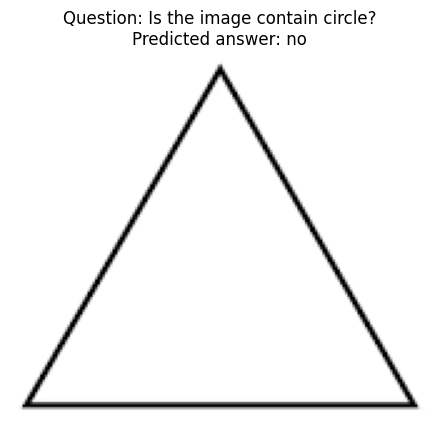

In [99]:
# Function to predict answer from an image and question
def predict_answer(image_path, question, img_embedder, tokenizer, text_embedder, vqa_model, transform, device):
    PIL_image = Image.open(image_path).convert('RGB')
    img = transform(PIL_image).unsqueeze(0).to(device)
    img_embedding = img_embedder(img).last_hidden_state.mean(dim=1).squeeze()

    inputs = tokenizer(question, return_tensors="pt", padding=True, truncation=True).to(device)
    question_embedding = text_embedder(**inputs).last_hidden_state.mean(dim=1).squeeze()

    concatenated = torch.cat((img_embedding, question_embedding)).unsqueeze(0).to(device)
    vqa_model.eval()

    with torch.no_grad():
        output = vqa_model(concatenated)
        predicted_label = torch.argmax(output, dim=1).item()

    predicted_answer = label_encoder.inverse_transform([predicted_label])[0]
    return predicted_answer

# Example usage
image_path = "/kaggle/input/traingle/download.png"
question = "Is the image contain circle?"
predicted_answer = predict_answer(image_path, question, img_embedder, tokenizer, text_embedder, vqa_model, transform, device)
print(f"Predicted answer: {predicted_answer}")

# Display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.title(f"Question: {question}\nPredicted answer: {predicted_answer}")
plt.show()

In [89]:
# import pandas as pd
# import ast
# from PIL import Image
# import matplotlib.pyplot as plt
# import io

# # Read the CSV file into a DataFrame
# #df = pd.read_csv('sampled_data.csv')

# # Convert the string representation of the image back to bytes
# # data_df_10k['image'] = data_df_10k['image'].apply(lambda x: io.BytesIO(ast.literal_eval(x))) 

# # Now you can recreate the PIL image from the bytes data
# sample = data_df_10k.iloc[0]  # Adjust the index as needed
# PIL_image = Image.open(sample['image']).convert('RGB')
# PIL_image
# # print(PIL_image)
# # img = transform(PIL_image.getdata)
# type(img)
# # temp = np.array(img).astype("float64")
# # temp=torch.Tensor(img)
# img = torch.Tensor(np.array(img).astype("float64"))
# img = torch.unsqueeze(img, dim=0)
# img
# # temp
# # PIL_image
# # Display the image using matplotlib
# # plt.imshow(PIL_image)
# # plt.show()


In [ ]:
# import pandas as pd
# from PIL import Image
# import matplotlib.pyplot as plt
# import io
# import ast
# import os

# # Assuming data_df is your DataFrame with columns: 'image', 'question', 'multiple_choice_answer'

# # Select the first 5 rows
# sample_df = data_df.head(2)

# # Create an output directory if it doesn't exist
# output_dir = '/kaggle/working'
# os.makedirs(output_dir, exist_ok=True)

# # Loop through the selected DataFrame
# for index, row in data_df.iterrows():
#     # Convert the string representation of bytes data to actual bytes
#     image_bytes = ast.literal_eval(row['image'])
#     image_bytes = bytes(image_bytes)
    
#     # Recreate the PIL image from the bytes data
#     PIL_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    
#     # Display the image using matplotlib
#     plt.imshow(PIL_image)
#     plt.title(f"Question: {row['question']}\nAnswer: {row['multiple_choice_answer']}")
#     plt.axis('off')
    
#     # Save the image
#     output_path = os.path.join(output_dir, f"sample_{index}.png")
#     plt.savefig(output_path, bbox_inches='tight')
#     plt.close()

# print(f"Images saved to {output_dir}")
